## Goals: 
- engineer features that highlight the time dimesionality of the data 
- test out four different algorithms

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#load dataset
df=pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')
#fill NaNs
df.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
#to datetime
df['week_start_date']=pd.to_datetime(df['week_start_date'])
test['week_start_date']=pd.to_datetime(test['week_start_date'])
#extract month to new column
df['month']=df.week_start_date.dt.month
test['month']=test.week_start_date.dt.month

In [5]:
df=pd.merge(df, labels, on=['city', 'year', 'weekofyear'])

### preprocessing - just experimenting here to figure out what features will help increase predictive performance

lag columns, take rolling averages, historical dengue counts

In [6]:
#idea historical average dengue counts and climate for that week in the year

In [7]:
#for each city, on that week, what is the avg num cases over the years?
df=df.join(df.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')
test=test.join(df.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')

In [8]:
#quick column fix
test.rename(columns={'total_cases': 'total_cases_avg'}, inplace=True)
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,total_cases_avg
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,4,10.722222
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,5,9.944444
2,sj,2008,20,2008-05-13,-0.0015,-0.012400,0.151083,0.091529,3.66,299.455714,...,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,5,11.500000
3,sj,2008,21,2008-05-20,-0.0015,-0.019867,0.124329,0.125686,0.00,299.690000,...,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,5,11.166667
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,5,13.777778


In [ ]:
# #plan to lag these columns 3 weeks 
# #this lag did not greatly improve model performance, the rolling avg was better
# cols_to_lag=[
#  'precipitation_amt_mm',
#  'reanalysis_air_temp_k',
#  'reanalysis_avg_temp_k',
#  'reanalysis_dew_point_temp_k',
#  'reanalysis_max_air_temp_k',
#  'reanalysis_min_air_temp_k',
#  'reanalysis_precip_amt_kg_per_m2',
#  'reanalysis_relative_humidity_percent',
#  'reanalysis_sat_precip_amt_mm',
#  'reanalysis_specific_humidity_g_per_kg',
#  'reanalysis_tdtr_k',
#  'station_precip_mm',
#  ]

In [ ]:
# for col in cols_to_lag:
#     df['lagged_'+col] = df[col].shift(2)

# for col in cols_to_lag:
#     test['lagged_'+col] = test[col].shift(2)

In [ ]:
# lagged_cols=[

#  'lagged_precipitation_amt_mm',
#  'lagged_reanalysis_air_temp_k',
#  'lagged_reanalysis_avg_temp_k',
#  'lagged_reanalysis_dew_point_temp_k',
#  'lagged_reanalysis_max_air_temp_k',
#  'lagged_reanalysis_min_air_temp_k',
#  'lagged_reanalysis_precip_amt_kg_per_m2',
#  'lagged_reanalysis_relative_humidity_percent',
#  'lagged_reanalysis_sat_precip_amt_mm',
#  'lagged_reanalysis_specific_humidity_g_per_kg',
#  'lagged_reanalysis_tdtr_k',
#  'lagged_station_precip_mm',
# ]

In [ ]:
# #fill NaNs after the lag
# df=df.fillna(df.groupby("month").transform(lambda x: x.fillna(x.mean())))
# test=test.fillna(test.groupby("month").transform(lambda x: x.fillna(x.mean())))

In [9]:
rolling_cols_sum=[
 'precipitation_amt_mm',
 'reanalysis_sat_precip_amt_mm',
 'station_precip_mm'
]

rolling_cols_avg=[
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c'
]

In [10]:
#loop to make the columns with rolling averages on independent vars
#takes the avg of prior 3 or 4weeks
for col in rolling_cols_sum:
    df['rolling_sum_'+col] = pd.rolling_sum(df[col], 3)
    test['rolling_sum_'+col] = pd.rolling_sum(test[col], 3)
#loop to make the columns with rolling averages on independent vars
#takes the avg of prior 3 weeks
for col in rolling_cols_avg:
    df['rolling_avg_'+col] = pd.rolling_mean(df[col], 3)
    test['rolling_avg_'+col] = pd.rolling_mean(test[col], 3)

In [ ]:
# # #engineer column to identify worst months for dengue in each location
# #this didn't help much either so am commenting it out here
# def bad_mo_sj (x):
#     if x == 10: return 1
#     if x == 11: return 1
#     if x == 9: return 1
#     return 0

# def bad_mo_iq (x):
#     if x == 1: return 1
#     if x == 12: return 1
#     if x == 2: return 1
#     return 0

In [ ]:
# #create the new column
# sj['key_months'] = sj.month.apply(bad_mo_sj)
# iq['key_months'] = iq.month.apply(bad_mo_iq)
# sj_test['key_months'] = sj_test.month.apply(bad_mo_sj)
# iq_test['key_months'] = iq_test.month.apply(bad_mo_iq)

### I tried out many, many combinations  before selecting the features below

In [23]:
features=[
'total_cases_avg',                                      
'rolling_avg_reanalysis_specific_humidity_g_per_kg',    
'rolling_avg_station_avg_temp_c',                       
'rolling_avg_reanalysis_dew_point_temp_k',              
'rolling_avg_station_min_temp_c',                       
'rolling_avg_station_max_temp_c',                       
'rolling_avg_reanalysis_min_air_temp_k',                
'rolling_avg_reanalysis_max_air_temp_k',                
'rolling_avg_reanalysis_air_temp_k',                    
'rolling_avg_reanalysis_avg_temp_k',            
'reanalysis_specific_humidity_g_per_kg',               
'reanalysis_dew_point_temp_k',                          
'reanalysis_min_air_temp_k',                           
'station_min_temp_c'     
    ]

In [24]:
#fill resulting NaNs from the lag functions
df.fillna(method='bfill', inplace=True)
test.fillna(method='bfill', inplace=True)

In [25]:
df.to_csv('train_edited.csv')

In [26]:
# separate san juan and iquitos
sj = df[df['city']=='sj']
iq = df[df['city']=='iq']

sj_test=test[test['city']=='sj']
iq_test=test[test['city']=='iq']

## Algorithms for comparison

In [27]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [28]:
sj_train_subtrain = sj.head(800)
sj_train_subtest = sj.tail(sj.shape[0] - 800)

iq_train_subtrain = iq.head(400)
iq_train_subtest = iq.tail(iq.shape[0] - 400)

LR: -29.354878 (14.533538)
DT: -31.899748 (15.181059)
RFR: -28.771049 (12.571495)
SVR: -22.534018 (18.161551)


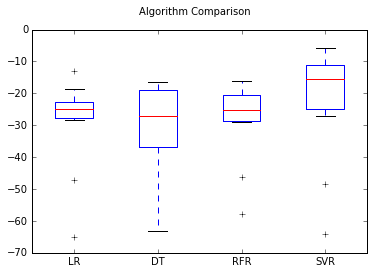

In [29]:
#code reference: Machine Learning Mastery - http://machinelearningmastery.com/
#set x and y

X= sj[features]
Y = sj['total_cases']

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: -6.856634 (1.954882)
DT: -8.825000 (1.981711)
RFR: -7.662308 (2.202473)
SVR: -5.939708 (2.497421)


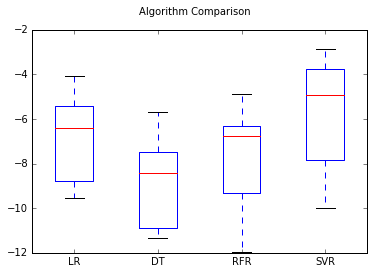

In [30]:
## IQUITOS
X= iq[features]
Y = iq['total_cases']

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### visualize the importances of selected features

Feature ranking:
1. feature 5 (0.219603)
2. feature 0 (0.199242)
3. feature 3 (0.124139)
4. feature 6 (0.075588)
5. feature 13 (0.072788)
6. feature 2 (0.072331)
7. feature 4 (0.065317)
8. feature 10 (0.036371)
9. feature 7 (0.032909)
10. feature 1 (0.031481)
11. feature 11 (0.027534)
12. feature 8 (0.021559)
13. feature 9 (0.012209)
14. feature 12 (0.008928)


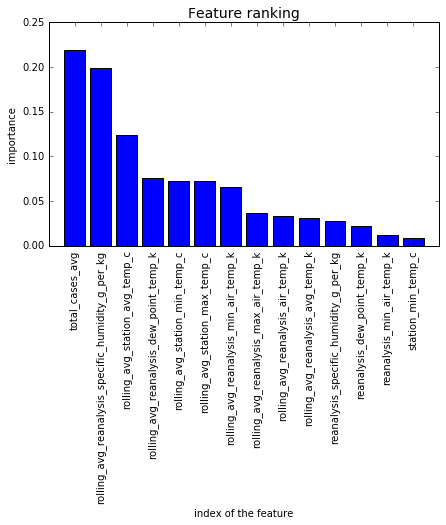

In [31]:
X= sj[features]
Y = sj['total_cases']

model =DecisionTreeRegressor()
model.fit(X,Y)
model.predict(sj_test[features])

importances=model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = X.columns

f, ax = plt.subplots(figsize=(7, 4))
plt.title("Feature ranking", fontsize = 14)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90 )
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 10)
plt.xlabel("index of the feature", fontsize = 10)

Feature ranking:
1. feature 0 (0.210651)
2. feature 9 (0.191498)
3. feature 2 (0.123492)
4. feature 1 (0.122149)
5. feature 5 (0.088039)
6. feature 4 (0.061838)
7. feature 7 (0.059036)
8. feature 6 (0.049467)
9. feature 13 (0.037347)
10. feature 10 (0.015099)
11. feature 12 (0.013948)
12. feature 8 (0.009956)
13. feature 3 (0.009134)
14. feature 11 (0.008344)


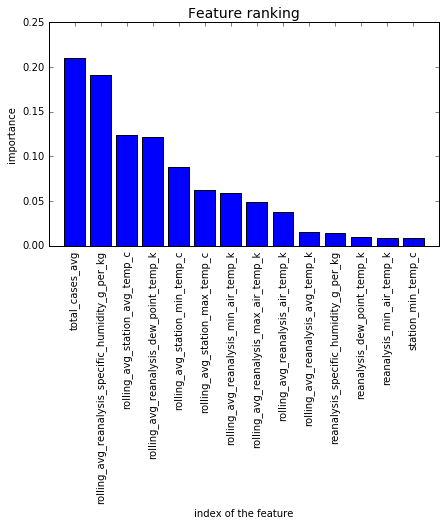

In [32]:
X= iq[features]
Y = iq['total_cases']

model =DecisionTreeRegressor()
model.fit(X,Y)
model.predict(iq_test[features])

importances=model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = X.columns

f, ax = plt.subplots(figsize=(7, 4))
plt.title("Feature ranking", fontsize = 14)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90 )
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 10)
plt.xlabel("index of the feature", fontsize = 10)

### perform gridsearch on support vector regressor

In [33]:
from sklearn.model_selection import GridSearchCV
import time as time

In [34]:
X_sj= sj[features]
Y_sj = sj['total_cases']

X_iq= iq[features]
Y_iq = iq['total_cases']

In [35]:
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X_sj,Y_sj)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

SVR complexity and bandwidth selected and model fitted in 7.502 s


In [36]:
model_svr_sj=svr.best_estimator_
model_svr_sj

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X_iq,Y_iq)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

SVR complexity and bandwidth selected and model fitted in 3.109 s


In [38]:
model_svr_iq=svr.best_estimator_
model_svr_iq

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
model_svr_sj.fit(X_sj,Y_sj)
model_svr_iq.fit(X_iq,Y_iq)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# test_model=SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
#   gamma=0.10000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
#   tol=0.001, verbose=False)

In [ ]:
# test_model_iq=SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
#   gamma=0.10000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
#   tol=0.001, verbose=False)

In [ ]:
# test_model.fit(sj_train_subtrain[features], sj_train_subtrain['total_cases'])

In [ ]:
# test_model_iq.fit(iq_train_subtrain[features], iq_train_subtrain['total_cases'])

In [40]:
preds_sj_svr= model_svr_sj.predict(sj_train_subtest[features]).astype(int)
preds_iq_svr=model_svr_iq.predict(iq_train_subtest[features]).astype(int)

In [41]:
sj_train_subtest['fitted'] = preds_sj_svr
iq_train_subtest['fitted'] = preds_iq_svr

In [42]:
sj_train_subtest['fitted'] = preds_sj_svr
iq_train_subtest['fitted'] = preds_iq_svr
### reset axis
sj_train_subtest.index = sj_train_subtest['week_start_date']
iq_train_subtest.index = iq_train_subtest['week_start_date']

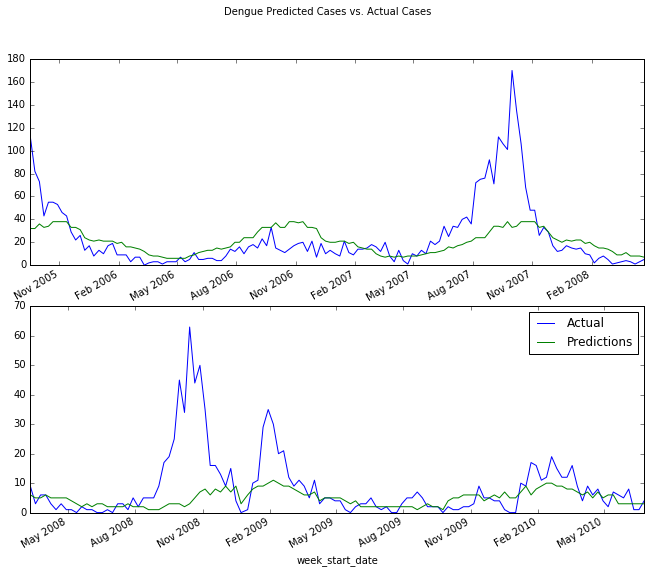

In [43]:
sj_train_subtest['fitted'] = preds_sj_svr
iq_train_subtest['fitted'] = preds_iq_svr
### reset axis
sj_train_subtest.index = sj_train_subtest['week_start_date']
iq_train_subtest.index = iq_train_subtest['week_start_date']

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9))
sj_train_subtest.total_cases.plot(ax=axes[0], label="Actual")
sj_train_subtest.fitted.plot(ax=axes[0], label="Predictions")

iq_train_subtest.total_cases.plot(ax=axes[1], label="Actual")
iq_train_subtest.fitted.plot(ax=axes[1], label="Predictions")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

### clearly the model is unable to predict the spikes in disease outbreak
Need to somehow account for the cases in previous weeks

Idea: use historical counts and/or predicted vals in the testing set where we have no counts and train the model using previous week counts as a feature

In [44]:
preds_sj_svr= model_svr_sj.predict(sj_test[features]).astype(float)
preds_iq_svr=model_svr_iq.predict(iq_test[features]).astype(float)

In [45]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([preds_sj_svr, preds_iq_svr])
#add a total cases column to the test df
test['total_cases'] = np.concatenate([preds_sj_svr, preds_iq_svr])
submission.to_csv("svr.csv")

### create dummy predictions for the test set for the next model iteration
The reason I added in the dataset avg is because the predictions were too low.  It seems like the model needs to know previous actual case counts before it can perform well.

In [51]:
test['total_cases']=test['total_cases']+test['total_cases_avg']

In [58]:
test['total_cases']=test['total_cases']+test['total_cases_avg']
test['random']=np.random.uniform(low=0.8, high=1.5, size=len(test))
#add some randomness
test['total_cases']=test['total_cases_avg']*test['random']
#save file
test.to_csv("test_preds_added.csv")